# Telecom Churn case study

## Import libraries

In [170]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
from matplotlib import style
plt.style.use("seaborn-pastel")

## Reading the Data

In [171]:
teledata = pd.read_csv("telecom_churn_data.csv")
teledata.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [172]:
teledata.shape

(99999, 226)

In [173]:
raw_teledata = teledata.copy()

In [174]:
teledata.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [175]:
teledata.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Data Understanding

The following data preparation steps are crucial for this problem:

 

1. Derive new features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

 

2. Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

After filtering the high-value customers, you should get about 29.9k rows.

 

3. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

 

In [176]:
all_columns = teledata.columns.tolist()
all_columns

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

### 1. Filter High-value customers

In [177]:
# We need only recharge columns for this 
rech_cols = [col for col in all_columns if "rech" in col]
rech_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [178]:
# Though we have total amount of recharge for talktime we dont have that number for data, instead we have average and number of rechanrges
# so let's calculate that amount

teledata['total_data_rech_amt_6'] = teledata['av_rech_amt_data_6'] * teledata['total_rech_data_6']
teledata['total_data_rech_amt_7'] = teledata['av_rech_amt_data_7'] * teledata['total_rech_data_7']
teledata['total_data_rech_amt_8'] = teledata['av_rech_amt_data_8'] * teledata['total_rech_data_8']
teledata['total_data_rech_amt_9'] = teledata['av_rech_amt_data_9'] * teledata['total_rech_data_9']

In [179]:
# Drop the columns that have been accounted for

teledata.drop(["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9","total_rech_data_6",
               "total_rech_data_7","total_rech_data_8","total_rech_data_9"], axis=1, inplace=True)

##### In churn prediction, we assume that there are three phases of customer lifecycle:

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In [180]:
# # Find Average recharge amount for the first 2 months (good phase i.e 6th and 7th month)

gd_phase_avg_rech_amt = (teledata['total_rech_amt_6'].fillna(0) + teledata['total_rech_amt_7'].fillna(0) + 
                               teledata['total_data_rech_amt_6'].fillna(0) + teledata['total_data_rech_amt_7'].fillna(0)) / 2

In [181]:
# Next we find the 70th percentile of the average recharge amount in the first two months(good phase)

gd_phase_avg_rech_amt_70 = np.percentile(gd_phase_avg_rech_amt, 70.0)
gd_phase_avg_rech_amt_70

478.0

#### High-value churn

In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

In [182]:
# Filter and retain only High value customer data for this problem

hv_cust_teledata = teledata[gd_phase_avg_rech_amt >= gd_phase_avg_rech_amt_70]

In [183]:
print("The shape of the dataset containing only high value customer data is: ", hv_cust_teledata.shape)

The shape of the dataset containing only high value customer data is:  (30001, 222)


### 2. Tagging Churners=1 and Non-churners=0 and creating the "Churn" target column

In [184]:
# Separate columns for the 9th month

mnth_9_cols = [col for col in hv_cust_teledata.columns if "9" in col]
mnth_9_cols

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_data_rec

In [185]:
# Separating the incoming, outgoing and mobile internet columns for the 9th month

mnth_9_ic_cols = [col for col in mnth_9_cols if "ic" in col and "mou" in col]
mnth_9_og_cols = [col for col in mnth_9_cols if "og" in col and "mou" in col]
mnth_9_mb_int_cols = [col for col in mnth_9_cols if "vol" in col]

In [186]:
mnth_9_ic_cols 

['roam_ic_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9']

In [187]:
# Sum of all Incoming columns

hv_cust_teledata["sum_ic"] = raw_teledata[mnth_9_ic_cols].sum(axis = 1)
hv_cust_teledata["sum_og"] = raw_teledata[mnth_9_og_cols].sum(axis = 1)
hv_cust_teledata["sum_mb_int"] = raw_teledata[mnth_9_mb_int_cols].sum(axis = 1)

In [188]:
sum_total = ["sum_ic", "sum_og", "sum_mb_int"]

In [189]:
hv_cust_teledata["Churn"] = np.sum(hv_cust_teledata[sum_total],axis=1)

In [190]:
# if the Churn value is greater than zero means that customer is NOT likely to churn as he is still using the services

hv_cust_teledata["Churn"] = hv_cust_teledata["Churn"].apply(lambda x: 0 if x>0 else 1)
hv_cust_teledata.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,sum_ic,sum_og,sum_mb_int,Churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,

In [191]:
# Drop all 9 month columns

hv_cust_teledata.drop([col for col in mnth_9_cols if col not in [ 'total_data_rech_amt_9']],axis = 1, inplace= True)

In [192]:
hv_cust_teledata.drop(["sum_ic", "sum_og", "sum_mb_int"], axis=1, inplace=True)

In [193]:
hv_cust_teledata.shape

(30001, 171)

### Checking for Class imbalance

In [194]:
hv_cust_teledata["Churn"].value_counts(normalize=True)

0    0.945302
1    0.054698
Name: Churn, dtype: float64

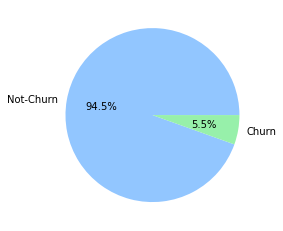

In [195]:
plt.pie(hv_cust_teledata["Churn"].value_counts(normalize=True),labels = ("Not-Churn", "Churn"), autopct='%1.1f%%')
plt.show()

Clearly the data is imbalanced. We will deal with the class imbalance later using SMOTE technique

## Data cleaning and EDA

### 1. Check for Missing values

In [196]:
# After calculating for the target variable "Churn" column its suitable to rename the dataset  
churn_data = hv_cust_teledata.copy()

In [197]:
churn_data.shape

(30001, 171)

In [198]:
missing_vals = ((100 * churn_data.isnull()).mean()).sort_values(ascending=False)
missing_vals

total_data_rech_amt_9       49.268358
arpu_3g_8                   46.825106
total_data_rech_amt_8       46.825106
fb_user_8                   46.825106
max_rech_data_8             46.825106
count_rech_2g_8             46.825106
count_rech_3g_8             46.825106
night_pck_user_8            46.825106
date_of_last_rech_data_8    46.825106
arpu_2g_8                   46.825106
arpu_3g_6                   44.148528
max_rech_data_6             44.148528
total_data_rech_amt_6       44.148528
night_pck_user_6            44.148528
fb_user_6                   44.148528
count_rech_3g_6             44.148528
date_of_last_rech_data_6    44.148528
count_rech_2g_6             44.148528
arpu_2g_6                   44.148528
date_of_last_rech_data_7    43.145228
total_data_rech_amt_7       43.145228
max_rech_data_7             43.145228
arpu_3g_7                   43.145228
count_rech_2g_7             43.145228
arpu_2g_7                   43.145228
count_rech_3g_7             43.145228
night_pck_us

Shall remove all columns with more than 40% missing values

In [199]:
len(missing_vals[missing_vals>40])

28

In [200]:
drop_missing_cols = missing_vals[missing_vals>40].index.tolist()
drop_missing_cols

['total_data_rech_amt_9',
 'arpu_3g_8',
 'total_data_rech_amt_8',
 'fb_user_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'night_pck_user_8',
 'date_of_last_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_6',
 'max_rech_data_6',
 'total_data_rech_amt_6',
 'night_pck_user_6',
 'fb_user_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'arpu_2g_6',
 'date_of_last_rech_data_7',
 'total_data_rech_amt_7',
 'max_rech_data_7',
 'arpu_3g_7',
 'count_rech_2g_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'night_pck_user_7',
 'fb_user_7']

In [201]:
churn_data.drop(drop_missing_cols, axis=1, inplace= True)

In [202]:
churn_data.shape

(30001, 143)

In [203]:
194-36

158

In [204]:
((100 * churn_data.isnull()).mean()).sort_values(ascending=False)

loc_ic_mou_8            3.913203
og_others_8             3.913203
loc_og_t2f_mou_8        3.913203
loc_ic_t2t_mou_8        3.913203
spl_og_mou_8            3.913203
loc_og_t2m_mou_8        3.913203
loc_ic_t2m_mou_8        3.913203
loc_ic_t2f_mou_8        3.913203
loc_og_t2t_mou_8        3.913203
std_og_t2f_mou_8        3.913203
roam_og_mou_8           3.913203
loc_og_mou_8            3.913203
std_ic_t2t_mou_8        3.913203
roam_ic_mou_8           3.913203
isd_og_mou_8            3.913203
std_ic_t2m_mou_8        3.913203
offnet_mou_8            3.913203
std_ic_t2f_mou_8        3.913203
onnet_mou_8             3.913203
std_og_t2t_mou_8        3.913203
std_ic_t2o_mou_8        3.913203
std_og_mou_8            3.913203
std_ic_mou_8            3.913203
spl_ic_mou_8            3.913203
std_og_t2m_mou_8        3.913203
isd_ic_mou_8            3.913203
std_og_t2c_mou_8        3.913203
ic_others_8             3.913203
loc_og_t2c_mou_8        3.913203
date_of_last_rech_8     1.943269
isd_og_mou

Since the rest of the columns have less than 5% missing values we can drop the rows having those missing values

In [205]:
# Drop the rows with missing values less than 5%

for i in churn_data.columns:
    churn_data = churn_data[~(churn_data[i].isnull())]

In [206]:
# Rechecking missing values

churn_data.isnull().sum()

mobile_number           0
circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
last_date_of_month_7    0
last_date_of_month_8    0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_m

There are no more missing values

In [207]:
churn_data.shape

(28163, 143)

### 2. Check for Unique values

In [208]:
# Circle_id column has only one unique value

churn_data["circle_id"].nunique()

1

In [209]:
# Lets check other columns for unique values
drop_unique= []
for i in churn_data.columns:
    if churn_data[i].nunique()==1:
        drop_unique.append(i) 

print(drop_unique)        

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [210]:
# Drop the columns with unique values as it doesnt contribute to analysis since it suggests no variance in data

churn_data.drop(drop_unique, axis = 1, inplace = True)

In [211]:
# We can also drop the date columns

for i in churn_data.columns:
    if "date" in i:
        churn_data.drop([i], axis = 1, inplace=True)

In [212]:
# We can remove the mobile_number column as it is doesnt contribute any information to analysis

churn_data.drop(["mobile_number"], axis = 1, inplace = True)

In [213]:
churn_data.shape

(28163, 126)

### 3. Check for high correlation between features

In [214]:
#corr = churn_data.corr()
#corr_list = corr.unstack()
#drop_list= corr_list.sort_values(ascending=False).drop_duplicates().head(20)
#drop_list

In [215]:
# If we find high corelation between features we drop them

corr = churn_data.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7              arpu_6              0.728704
arpu_8              arpu_6              0.671437
                    arpu_7              0.778413
onnet_mou_7         onnet_mou_6         0.770224
onnet_mou_8         onnet_mou_6         0.646114
                    onnet_mou_7         0.811314
offnet_mou_7        offnet_mou_6        0.755880
offnet_mou_8        offnet_mou_6        0.605742
                    offnet_mou_7        0.772001
roam_ic_mou_8       roam_ic_mou_7       0.618233
roam_og_mou_6       roam_ic_mou_6       0.647696
roam_og_mou_8       roam_og_mou_7       0.605246
loc_og_t2t_mou_7    loc_og_t2t_mou_6    0.801091
loc_og_t2t_mou_8    loc_og_t2t_mou_6    0.708473
                    loc_og_t2t_mou_7    0.836495
loc_og_t2m_mou_7    loc_og_t2m_mou_6    0.790918
loc_og_t2m_mou_8    loc_og_t2m_mou_6    0.698190
                    loc_og_t2m_mou_7    0.826281
loc_og_t2f_mou_7    loc_og_t2f_mou_6    0.812776
loc_og_t2f_mou_8    loc_og_t2f_mou_6    0.674290
                    

In [216]:
# List of columns that are explained well by other columns

drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

In [217]:
# Drop the highly correlated columns

churn_data.drop(drop_col_corr, axis=1, inplace=True)
churn_data.shape

(28163, 87)

### Deriving new features 

In [218]:
churn_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,422.16,533.91,255.79,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.00,356.00,0.03,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.04,94.09,129.74,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,125.33,87.68,159.11,14.06,5.98,0.18,0.00,0.00,0.00,81.76,44.21,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,116.63,174.41,224.21,0.51,0.00,13.38,0.00,0.00,0.00,2.94,14.89,57.29,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,0,179,0,0.00,0.48,0.01,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0.0,0
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.56,0.0,0.0,0.0,3.48,0.88,40.54,0.00,2.91,0.05,0.23,0.96,0.13,3.18,5.66,1.04,0.00,0.0,0.0,0.00,0.00,0.00,1.23,0.65,0.20,7,14,1,252,1255,455,252,0,455,87.05,57.76,7.97,0,0,0,0,0,0,4,5,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,0


In [219]:
# Create a total mou combining offnet and onnet

churn_data["total_mou_6"] = churn_data["onnet_mou_6"] + churn_data["offnet_mou_6"]
churn_data["total_mou_7"] = churn_data["onnet_mou_7"] + churn_data["offnet_mou_7"]
churn_data["total_mou_8"] = churn_data["onnet_mou_8"] + churn_data["offnet_mou_8"]


In [220]:
# Drop the offnet and onnet columns

churn_data.drop(["onnet_mou_6",  "onnet_mou_7", "onnet_mou_8", "offnet_mou_6", "offnet_mou_7","offnet_mou_8"], axis=1, inplace= True)

In [221]:
col_for_6_7 = [col[:-2] for col in churn_data.columns if '6' in col or '7' in col]
col_for_6_7

['arpu',
 'arpu',
 'roam_ic_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'roam_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'loc_og_mou',
 'std_og_t2f_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'std_og_mou',
 'isd_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'spl_og_mou',
 'og_others',
 'og_others',
 'loc_ic_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2t_mou',
 'std_ic_t2f_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'std_ic_mou',
 'spl_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'ic_others',
 'total_rech_num',
 'total_rech_num',
 'max_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'last_day_rch_amt',
 'vol_2g_mb',
 'vol_2g_mb',
 'monthly_2g',
 'monthly_2g',
 'sachet_2g',
 'sachet_2g',
 'monthly_3g',
 'monthly_3g',
 'sachet_3g',
 'sachet_3g',
 'total_mou',
 'total_mou']

In [222]:
# lets merge the good phase column data together i.e. 6th and 7th month data

for col in set(col_for_6_7):
    churn_data[f'gd_ph_{col}'] = ( churn_data[f'{col}_6'] + churn_data[f'{col}_7'] ) / 2
    churn_data.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
    
churn_data.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,total_mou_8,gd_ph_isd_ic_mou,gd_ph_monthly_2g,gd_ph_arpu,gd_ph_sachet_3g,gd_ph_monthly_3g,gd_ph_loc_og_t2c_mou,gd_ph_std_ic_mou,gd_ph_loc_og_mou,gd_ph_spl_ic_mou,gd_ph_std_ic_t2t_mou,gd_ph_isd_og_mou,gd_ph_std_og_t2f_mou,gd_ph_sachet_2g,gd_ph_roam_ic_mou,gd_ph_max_rech_amt,gd_ph_roam_og_mou,gd_ph_last_day_rch_amt,gd_ph_std_ic_t2f_mou,gd_ph_total_mou,gd_ph_total_rech_num,gd_ph_vol_2g_mb,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_ic_others,gd_ph_std_og_mou,gd_ph_loc_ic_mou
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,57.74,19.38,18.74,0.0,1,378.20,8.295,0.0,1209.5150,0.0,0.0,0.0,176.810,478.035,0.105,24.360,0.090,13.37,0.0,24.86,1185.0,18.165,0.0,43.215,566.555,5.0,0.000,2.25,0.0,15.465,68.000,391.555
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,21.03,910.65,122.16,0.0,0,171.56,0.000,0.5,435.4720,0.0,0.0,0.0,13.545,333.135,0.000,0.290,0.000,0.00,0.5,0.00,122.0,0.000,25.0,0.000,470.005,20.0,178.000,0.00,0.0,0.000,136.870,52.630
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,720,0.00,0.00,0.00,0.0,0,1068.53,0.000,0.0,556.1030,0.0,0.0,0.0,62.985,95.565,0.000,10.020,0.000,0.00,0.0,0.00,50.0,0.000,25.0,0.000,944.565,24.0,0.000,0.00,0.0,0.000,848.990,106.505
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,604,40.45,51.86,0.00,0.0,0,239.47,14.115,0.0,134.1235,0.0,1.0,0.0,8.915,132.795,0.000,0.255,0.005,0.00,0.0,0.00,89.5,0.000,89.5,0.000,137.195,4.0,0.240,0.05,0.0,2.675,4.355,145.520
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,1328,358.10,2706.83,1714.67,0.0,0,0.00,0.000,0.0,1669.9265,2.0,4.5,0.0,4.420,0.000,0.000,1.455,0.000,0.00,0.0,0.00,753.5,0.000,126.0,0.595,0.000,10.5,72.405,0.00,0.0,0.940,0.000,2.180


In [223]:
churn_data.shape

(28163, 58)

In [224]:
# Reset the index of the dataset

churn_data.reset_index(inplace= True, drop=True)
churn_data.head(10)

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,total_mou_8,gd_ph_isd_ic_mou,gd_ph_monthly_2g,gd_ph_arpu,gd_ph_sachet_3g,gd_ph_monthly_3g,gd_ph_loc_og_t2c_mou,gd_ph_std_ic_mou,gd_ph_loc_og_mou,gd_ph_spl_ic_mou,gd_ph_std_ic_t2t_mou,gd_ph_isd_og_mou,gd_ph_std_og_t2f_mou,gd_ph_sachet_2g,gd_ph_roam_ic_mou,gd_ph_max_rech_amt,gd_ph_roam_og_mou,gd_ph_last_day_rch_amt,gd_ph_std_ic_t2f_mou,gd_ph_total_mou,gd_ph_total_rech_num,gd_ph_vol_2g_mb,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_ic_others,gd_ph_std_og_mou,gd_ph_loc_ic_mou
0,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,57.74,19.38,18.74,0.0,1,378.20,8.295,0.0,1209.5150,0.0,0.0,0.00,176.810,478.035,0.105,24.360,0.090,13.370,0.0,24.86,1185.0,18.165,0.0,43.215,566.555,5.0,0.000,2.250,0.000,15.465,68.000,391.555
1,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,21.03,910.65,122.16,0.0,0,171.56,0.000,0.5,435.4720,0.0,0.0,0.00,13.545,333.135,0.000,0.290,0.000,0.000,0.5,0.00,122.0,0.000,25.0,0.000,470.005,20.0,178.000,0.000,0.000,0.000,136.870,52.630
2,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,720,0.00,0.00,0.00,0.0,0,1068.53,0.000,0.0,556.1030,0.0,0.0,0.00,62.985,95.565,0.000,10.020,0.000,0.000,0.0,0.00,50.0,0.000,25.0,0.000,944.565,24.0,0.000,0.000,0.000,0.000,848.990,106.505
3,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,604,40.45,51.86,0.00,0.0,0,239.47,14.115,0.0,134.1235,0.0,1.0,0.00,8.915,132.795,0.000,0.255,0.005,0.000,0.0,0.00,89.5,0.000,89.5,0.000,137.195,4.0,0.240,0.050,0.000,2.675,4.355,145.520
4,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,1328,358.10,2706.83,1714.67,0.0,0,0.00,0.000,0.0,1669.9265,2.0,4.5,0.00,4.420,0.000,0.000,1.455,0.000,0.000,0.0,0.00,753.5,0.000,126.0,0.595,0.000,10.5,72.405,0.000,0.000,0.940,0.000,2.180
5,393.909,0.00,0.00,0.00,28.44,0.00,735.74,0.00,0.00,0.0,29.43,5.59,0.00,19.01,0.0,1.20,0.00,6,130,130,0.00,0,0,0,0,1155,0.00,0.00,0.00,0.0,0,764.19,9.540,0.0,425.2725,0.0,0.0,0.00,22.220,48.585,0.000,11.950,0.000,0.000,0.0,0.00,70.0,0.000,20.0,0.000,504.195,24.5,0.000,0.000,0.000,0.000,455.610,37.605
6,229.769,0.00,0.00,0.00,203.21,13.18,13.18,0.74,0.00,0.0,60.64,0.00,0.00,0.00,0.0,145.94,0.35,3,150,110,0.00,0,0,0,0,2010,0.00,0.00,0.00,0.0,0,217.13,207.650,0.0,454.2980,0.0,0.0,0.00,0.700,293.850,0.000,0.000,0.545,64.785,0.0,0.00,150.0,0.000,150.0,0.700,359.205,4.0,0.000,0.440,0.000,0.280,64.785,168.210
7,179.218,0.00,0.00,0.00,95.69,0.00,129.39,0.00,0.00,0.0,154.26,13.36,0.00,16.88,0.0,0.00,0.00,3,130,130,0.00,0,0,0,0,1265,0.00,0.00,0.00,0.0,0,225.09,0.000,0.0,1224.5990,0.0,0.0,0.03,47.220,994.830,0.000,32.810,0.000,0.000,0.0,0.00,250.0,0.000,180.0,0.000,2144.585,9.0,0.000,1.460,0.725,0.000,1149.520,836.265
8,706.020,0.00,0.00,0.00,241.61,0.00,5.23,117.19,0.00,0.0,534.24,0.00,0.00,10.63,0.0,0.00,0.00,14,130,130,0.00,0,1,0,0,697,0.00,0.00,0.00,0.0,0,364.03,0.265,0.0,1059.6865,0.0,0.0,2.52,178.560,328.630,0.000,20.860,264.440,0.000,4.5,0.00,135.0,0.000,65.0,0.000,638.610,25.0,0.135,3.980,0.000,0.000,41.550,665.065
9,368.807,0.00,0.00,4.48,128.51,0.00,1.93,0.00,6.33,0.0,163.76,0.00,0.00,0.00,0.0,0.00,0.00,25,30,25,603.58,0,16,0,0,729,277.97,535.63,1459.45,0.0,0,134.92,0.000,1.0,386.5860,0.0,0.0,0.00,0.000,148.260,0.015,0.000,0.000,0.000,6.0,0.00,92.0,0.000,25.0,0.000,149.885,18.5,366.600,3.965,1.130,0.000,0.000,160.500


In [225]:
churn_data.describe()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,total_mou_8,gd_ph_isd_ic_mou,gd_ph_monthly_2g,gd_ph_arpu,gd_ph_sachet_3g,gd_ph_monthly_3g,gd_ph_loc_og_t2c_mou,gd_ph_std_ic_mou,gd_ph_loc_og_mou,gd_ph_spl_ic_mou,gd_ph_std_ic_t2t_mou,gd_ph_isd_og_mou,gd_ph_std_og_t2f_mou,gd_ph_sachet_2g,gd_ph_roam_ic_mou,gd_ph_max_rech_amt,gd_ph_roam_og_mou,gd_ph_last_day_rch_amt,gd_ph_std_ic_t2f_mou,gd_ph_total_mou,gd_ph_total_rech_num,gd_ph_vol_2g_mb,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_ic_others,gd_ph_std_og_mou,gd_ph_loc_ic_mou
count,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000
mean,528.992500,13.145865,20.926258,1.789363,247.845569,1.646062,322.121339,1.989213,6.889342,0.061151,235.639315,14.625113,2.692254,46.761176,0.027889,11.437856,1.291328,10.435323,164.597131,94.779640,109.831129,0.160210,1.100771,0.209459,0.208287,1233.456627,173.745705,180.655113,157.965702,8.375813,0.028229,597.378280,11.458002,0.183397,567.163074,0.217200,0.213773,1.766261,49.261396,263.016895,0.041413,15.535415,2.047679,1.840391,1.154618,14.632102,167.748198,23.757457,98.522885,2.835280,656.094111,12.026489,127.717157,6.610121,0.359434,1.371220,362.567597,241.031533
std,500.479643,76.125433,107.722393,7.390599,367.353912,11.126142,615.275135,45.888765,20.813297,3.421503,313.175366,73.017056,20.476161,142.430462,0.113430,72.276371,13.164084,9.288002,169.014286,141.789453,317.809110,0.413067,2.573361,0.619138,1.116503,962.975074,424.621028,447.089836,415.879933,53.404668,0.165628,706.447419,74.792010,0.392058,431.807280,0.940707,0.565446,6.536779,135.463961,361.575126,0.154356,76.790814,45.536401,11.647474,2.435548,66.404361,148.011960,94.459260,108.064480,18.312495,657.870003,8.650631,304.044111,17.610173,2.533710,14.081974,586.639498,303.003271
min,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-451.713500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,258.075500,0.000000,0.000000,0.000000,31.410000,0.000000,0.000000,0.000000,0.000000,0.000000,51.185000,0.000000,0.000000,0.940000,0.000000,0.000000,0.000000,4.000000,67.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,472.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.170000,0.000000,0.000000,355.689750,0.000000,0.000000,0.000000,2.955000,45.762500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104.000000,0.000000,30.000000,0.000000,178.822500,6.500000,0.000000,0.000000,0.000000,0.000000,2.450000,62.502500
50%,445.338000,0.000000,0.000000,0.000000,124.060000,0.000000,34.990000,0.000000,0.700000,0.000000,140.310000,0.330000,0.0

In [226]:
# Dividng data into Continuous and categorical columns

cont=[]
cat=[]
for i in churn_data.columns:
    if churn_data[i].nunique()>20:
        print(i,"\t\t",churn_data[i].nunique(),"\t\tContinuous")
        cont = [i] + cont
    else:
        print(i,"\t\t",churn_data[i].nunique(),"\t\tCategorical")
        cat= [i] + cat 
print(cont)
print("\n\n",cat)

arpu_8 		 27308 		Continuous
roam_ic_mou_8 		 3401 		Continuous
roam_og_mou_8 		 3953 		Continuous
loc_og_t2c_mou_8 		 1709 		Continuous
loc_og_mou_8 		 17417 		Continuous
std_og_t2f_mou_8 		 1494 		Continuous
std_og_mou_8 		 14558 		Continuous
isd_og_mou_8 		 854 		Continuous
spl_og_mou_8 		 3179 		Continuous
og_others_8 		 130 		Continuous
loc_ic_mou_8 		 17918 		Continuous
std_ic_t2t_mou_8 		 4241 		Continuous
std_ic_t2f_mou_8 		 1875 		Continuous
std_ic_mou_8 		 7643 		Continuous
spl_ic_mou_8 		 80 		Continuous
isd_ic_mou_8 		 3303 		Continuous
ic_others_8 		 1244 		Continuous
total_rech_num_8 		 95 		Continuous
max_rech_amt_8 		 180 		Continuous
last_day_rch_amt_8 		 178 		Continuous
vol_2g_mb_8 		 9989 		Continuous
monthly_2g_8 		 6 		Categorical
sachet_2g_8 		 34 		Continuous
monthly_3g_8 		 12 		Categorical
sachet_3g_8 		 29 		Continuous
aon 		 3284 		Continuous
aug_vbc_3g 		 9489 		Continuous
jul_vbc_3g 		 9460 		Continuous
jun_vbc_3g 		 8722 		Continuous
sep_vbc_3g 		 2598 		

In [227]:
# Check datatype of Continuous columns
for i in cont:
    print (i, "\t",churn_data[i].dtypes)

gd_ph_loc_ic_mou 	 float64
gd_ph_std_og_mou 	 float64
gd_ph_ic_others 	 float64
gd_ph_og_others 	 float64
gd_ph_spl_og_mou 	 float64
gd_ph_vol_2g_mb 	 float64
gd_ph_total_rech_num 	 float64
gd_ph_total_mou 	 float64
gd_ph_std_ic_t2f_mou 	 float64
gd_ph_last_day_rch_amt 	 float64
gd_ph_roam_og_mou 	 float64
gd_ph_max_rech_amt 	 float64
gd_ph_roam_ic_mou 	 float64
gd_ph_sachet_2g 	 float64
gd_ph_std_og_t2f_mou 	 float64
gd_ph_isd_og_mou 	 float64
gd_ph_std_ic_t2t_mou 	 float64
gd_ph_spl_ic_mou 	 float64
gd_ph_loc_og_mou 	 float64
gd_ph_std_ic_mou 	 float64
gd_ph_loc_og_t2c_mou 	 float64
gd_ph_sachet_3g 	 float64
gd_ph_arpu 	 float64
gd_ph_isd_ic_mou 	 float64
total_mou_8 	 float64
sep_vbc_3g 	 float64
jun_vbc_3g 	 float64
jul_vbc_3g 	 float64
aug_vbc_3g 	 float64
aon 	 int64
sachet_3g_8 	 int64
sachet_2g_8 	 int64
vol_2g_mb_8 	 float64
last_day_rch_amt_8 	 int64
max_rech_amt_8 	 int64
total_rech_num_8 	 int64
ic_others_8 	 float64
isd_ic_mou_8 	 float64
spl_ic_mou_8 	 float64
std_ic_mou_

### 4. Check for Outliers

In [228]:
# we can see that most of the columns have outliers and since there are 0.0 values(meaning the service was not used) those are actual outliers
# We need to further investigate the other columns that may be actual data for analysis or maybe outliers

boxplt_cols = ['arpu_8', 'loc_og_mou_8','std_og_mou_8', 'loc_ic_mou_8','max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8', 
               'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt', 
              'gd_ph_loc_og_mou', 'gd_ph_arpu']

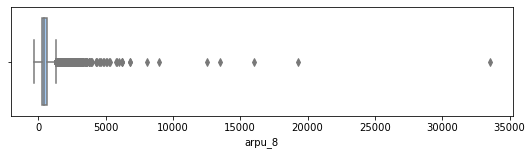

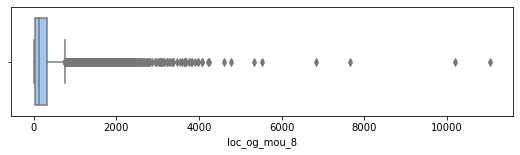

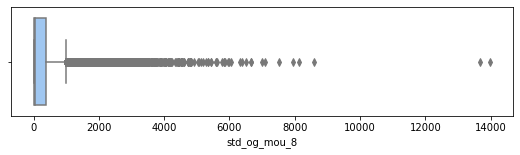

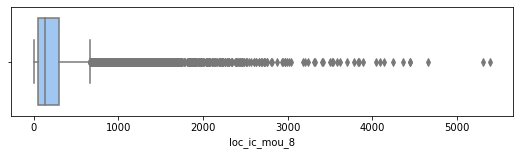

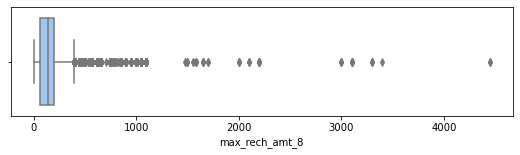

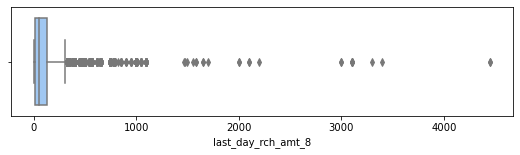

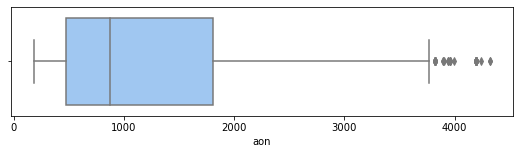

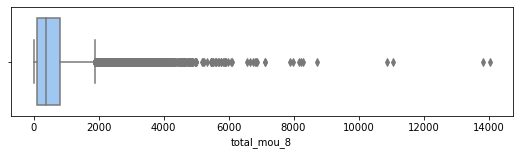

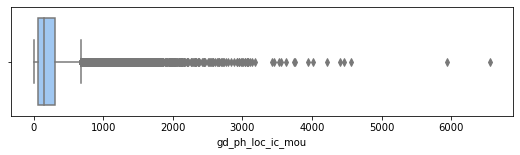

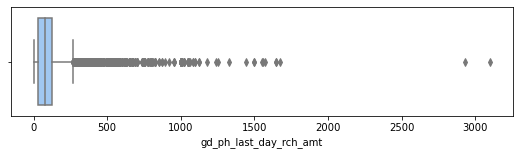

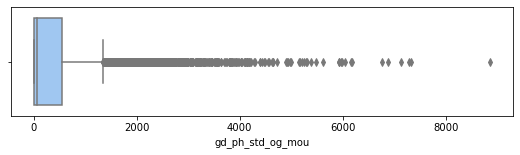

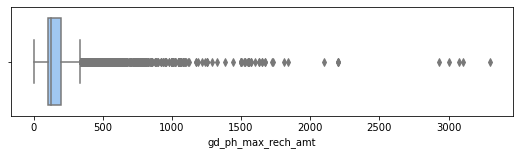

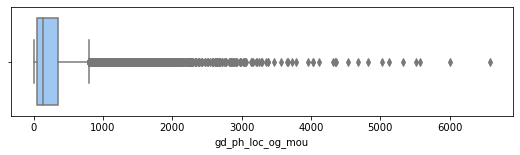

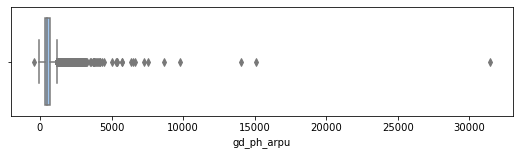

In [229]:
for i in boxplt_cols:
    plt.figure(figsize= (9,2))
    sns.boxplot(churn_data[i])
    plt.show()

We will have to cap these values with upper and lower bound. We will do that after we carry out the analysis.

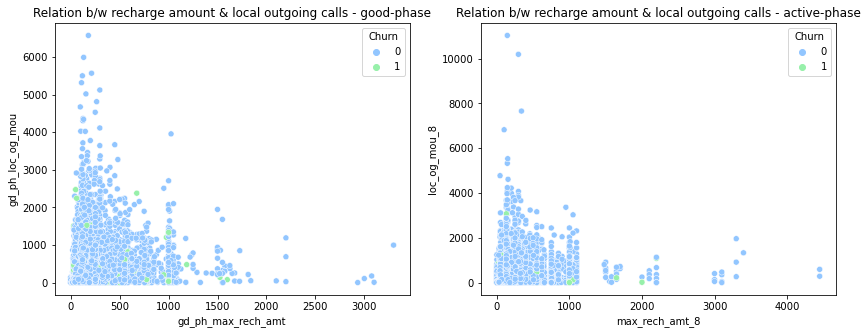

In [230]:
# Lets check the relation between recharge amount and local outgoing calls

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(data= churn_data, x='gd_ph_max_rech_amt', y = 'gd_ph_loc_og_mou', hue= "Churn")
plt.title(label= "Relation b/w recharge amount & local outgoing calls - good-phase")
#plt.ylim(0,1000)

plt.subplot(1,2,2)
sns.scatterplot(data= churn_data, x='max_rech_amt_8', y='loc_og_mou_8', hue = "Churn")
plt.title(label= "Relation b/w recharge amount & local outgoing calls - active-phase")
#plt.ylim(0,1100000)

plt.show()

Inference:

Users who were recharging with high amounts were no using the local outgoing services much.

Customers whose max recharge amount and local outgoing services were both very less in the good phase and active phase churned more

In [231]:
churn_data["gd_ph_vbc_3g"] = churn_data["jun_vbc_3g"] + churn_data["jul_vbc_3g"]

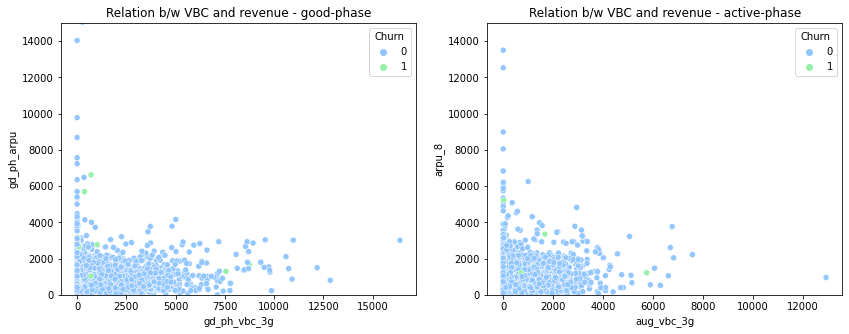

In [232]:
# Lets check how the VBC effects the revenue

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_vbc_3g', data=churn_data, hue='Churn')
plt.title(label= "Relation b/w VBC and revenue - good-phase")
plt.ylim(0,15000)

plt.subplot(1,2,2)
sns.scatterplot(y='arpu_8', x='aug_vbc_3g', data=churn_data, hue='Churn')
plt.title(label= "Relation b/w VBC and revenue - active-phase")
plt.ylim(0,15000)

plt.show()

Inference:

The revenue is higher towards the lesser consumption side.

Customers using less VBC and generating higher revenue are likely to churn as per data

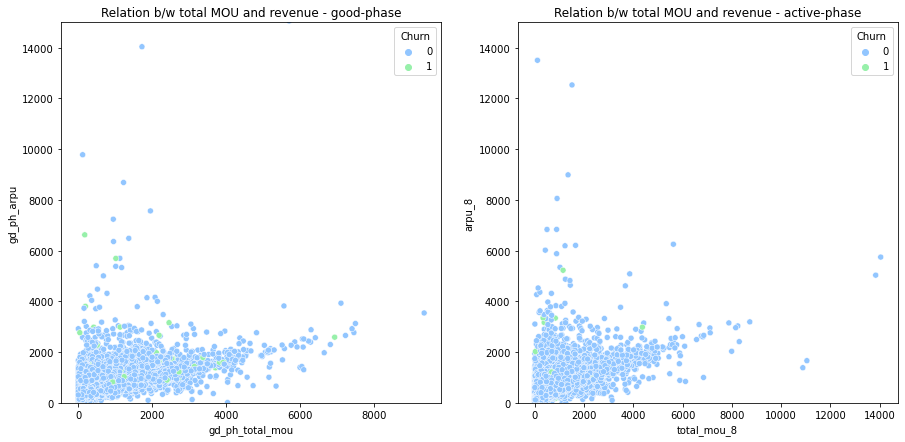

In [233]:
# Lets check how the total_mou effects the revenue

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_total_mou', data=churn_data, hue='Churn')
plt.title(label= "Relation b/w total MOU and revenue - good-phase")
plt.ylim(0,15000)
plt.subplot(1,2,2)
sns.scatterplot(y='arpu_8', x='total_mou_8', data=churn_data, hue='Churn')
plt.title(label= "Relation b/w total MOU and revenue - active-phase")
plt.ylim(0,15000)
plt.show()

Inference:

We can deduce that many high revenue generating customers having very low minutes of usage have churned in action phase. Hence we can target high revenue customers with reduced MOU in action phase.

It is also interesting that though the MOU is between 0-2000, the revenue is highest in that region that tells us these users had other services that were boosting the revenue

In [234]:
# Capping the outliers with ubber and lower bound values

for i in boxplt_cols:
    q1=churn_data[i].describe()["25%"]
    q3=churn_data[i].describe()["75%"]
    iqr=q3-q1
    u_bound = q3 + 1.5 * iqr
    l_bound = q1 - 1.5 * iqr
    churn_data[i]=np.where(churn_data[i]<l_bound,l_bound,churn_data[i])
    churn_data[i]=np.where(churn_data[i]>u_bound,u_bound,churn_data[i])

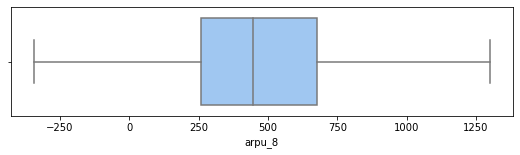

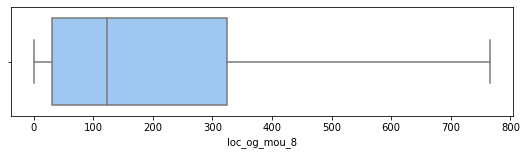

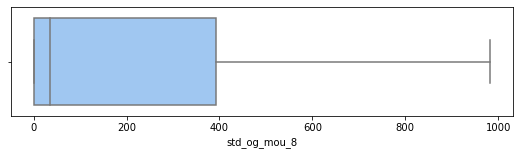

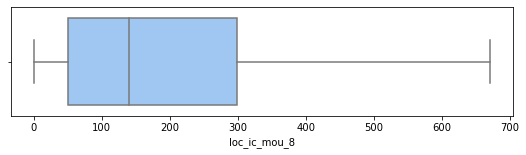

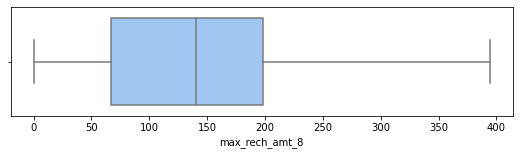

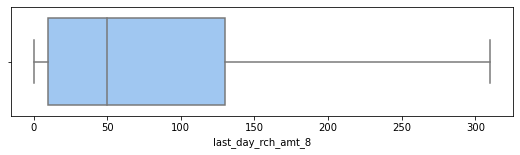

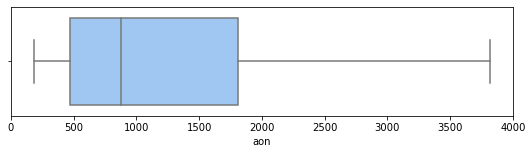

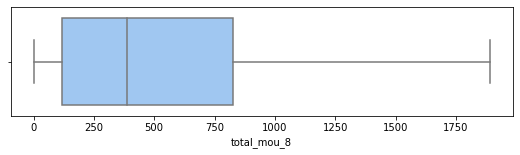

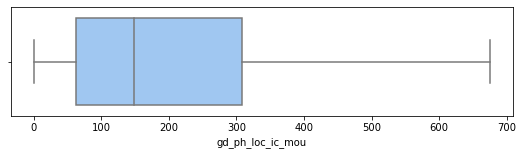

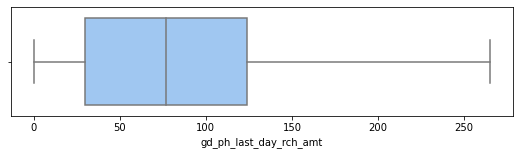

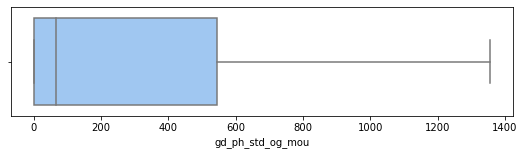

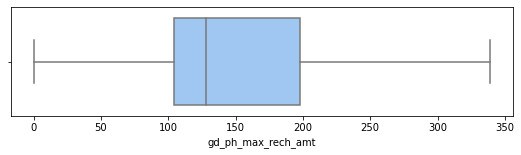

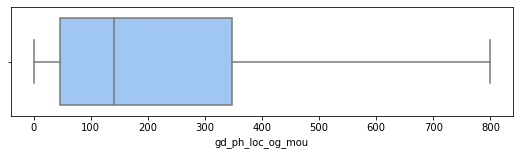

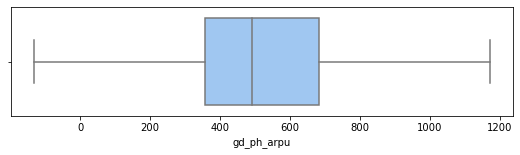

In [235]:
for i in boxplt_cols:
    plt.figure(figsize= (9,2))
    sns.boxplot(churn_data[i])
    plt.show()

## Data Preparation

### Splitting Data into Training and Test Sets

In [236]:
from sklearn.model_selection import train_test_split

# Assigning feature variable to X
X = churn_data.drop("Churn", axis=1)

# Assigning target variable to y
y = churn_data["Churn"]

# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, test_size=0.3, random_state=100)

#### Rescaling the features using MinMaxScaler

In [237]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Fit and transform train set 
X_train[cont] = scaler.fit_transform(X_train[cont])

# Transform test set
X_test[cont] = scaler.transform(X_test[cont])


In [238]:
# Summary statistics of standardized variables
round(X_train.describe(),2)

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_mou_8,gd_ph_isd_ic_mou,gd_ph_monthly_2g,gd_ph_arpu,gd_ph_sachet_3g,gd_ph_monthly_3g,gd_ph_loc_og_t2c_mou,gd_ph_std_ic_mou,gd_ph_loc_og_mou,gd_ph_spl_ic_mou,gd_ph_std_ic_t2t_mou,gd_ph_isd_og_mou,gd_ph_std_og_t2f_mou,gd_ph_sachet_2g,gd_ph_roam_ic_mou,gd_ph_max_rech_amt,gd_ph_roam_og_mou,gd_ph_last_day_rch_amt,gd_ph_std_ic_t2f_mou,gd_ph_total_mou,gd_ph_total_rech_num,gd_ph_vol_2g_mb,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_ic_others,gd_ph_std_og_mou,gd_ph_loc_ic_mou,gd_ph_vbc_3g
count,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00,19714.00
mean,0.47,0.00,0.00,0.01,0.28,0.00,0.25,0.00,0.01,0.00,0.31,0.00,0.00,0.01,0.00,0.00,0.00,0.07,0.38,0.27,0.01,0.16,0.02,0.21,0.01,0.29,0.02,0.02,0.01,0.00,0.29,0.00,0.18,0.52,0.01,0.22,0.00,0.01,0.29,0.00,0.00,0.00,0.00,0.04,0.01,0.45,0.01,0.34,0.00,0.07,0.07,0.02,0.01,0.00,0.00,0.24,0.32,338.24
std,0.22,0.02,0.02,0.02,0.30,0.03,0.35,0.01,0.02,0.01,0.30,0.02,0.02,0.02,0.02,0.02,0.01,0.07,0.25,0.28,0.03,0.41,0.06,0.62,0.04,0.26,0.06,0.05,0.04,0.02,0.28,0.01,0.39,0.21,0.04,0.57,0.02,0.02,0.30,0.01,0.02,0.01,0.03,0.08,0.02,0.25,0.04,0.26,0.02,0.07,0.06,0.04,0.03,0.01,0.01,0.32,0.29,791.67
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.30,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.17,0.03,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.38,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.00,0.11,0.00,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.09,0.00
50%,0.43,0.00,0.00,0.00,0.16,0.00,0.04,0.00,0.00,0.00,0.21,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.33,0.16,0.00,0.00,0.00,0.00,0.00,0.19,0.00,0.00,0.00,0.00,0.21,0.00,0.00,0.48,0.00,0.00,0.00,0.00,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.29,0.00,0.05,0.06,0.00,0.00,0.00,0.00,0.05,0.22,0.00
75%,0.58,0.00,0.00,0.00,0.43,0.00,0.40,0.00,0.01,0.00,0.44,0.00,0.00,0.01,0.00,0.00,0.00,0.09,0.50,0.42,0.01,0.00,0.02,0.00,0.00,0.45,0.02,0.02,0.01,0.00,0.44,0.00,0.00,0.63,0.00,0.00,0.00,0.01,0.44,0.00,0.00,0.00,0.00,0.03,0.00,0.58,0.00,0.47,0.00,0.10,0.09,0.01,0.01,0.00,0.00,0.40,0.46,314.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,1.00,16.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4.50,1.00,1.00,11.50,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,16381.17


### Handling Class Imbalance using SMOTE technique

In [239]:
churn_data["Churn"].value_counts(normalize= True)

0    0.971771
1    0.028229
Name: Churn, dtype: float64

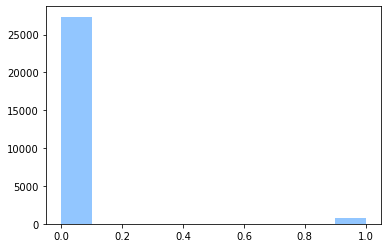

In [240]:
plt.hist(churn_data["Churn"])
plt.show()

In [241]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [242]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train)

In [243]:
print("Dimension of X_train_smt Shape:", X_train_smt.shape)
print("Dimension of y_train_smt Shape:", y_train_smt.shape)

Dimension of X_train_smt Shape: (38286, 58)
Dimension of y_train_smt Shape: (38286,)


In [244]:
y_train.value_counts(normalize =True)

0    0.971036
1    0.028964
Name: Churn, dtype: float64

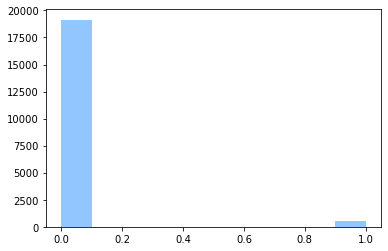

In [245]:
plt.hist(y_train)
plt.show()

## Model Building

### MODEL 1: Logistic Regression without PCA

Using Logistic regression model we will be finding the features that are predictors of target Churn variable using RFE for Feature selection instead of PCA


In [246]:
import statsmodels.api as sm

##### LR Model 1 

In [247]:
# Initial logistic regression model

# Note that the SMOTE resampled Train set is used with statsmodels.api.GLM since it doesnot support class_weight
log_m1 = sm.GLM(y_train_smt,(sm.add_constant(X_train_smt)), family = sm.families.Binomial())
log_m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38286
Model:                            GLM   Df Residuals:                    38228
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Feb 2023   Deviance:                       30232.
Time:                        23:50:32   Pearson chi2:                 8.20e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1612      0.063      2.578      0.010       0.039       0.284
arpu_8                     5.0222      0.219     22.970      0.000       4.594       5.451
roam_ic_mou_8            -28.4409      2.188    -13.001      0.000     -32.729     -24.153
roam_og_mou_8             -3.3670      1.253     -2.686      0.007      -5.824      -0.910
loc_og_t2c_mou_8           4.7636      0.925      5.148      0.000       2.950       6.577
loc_og_mou_8              -2.4809      0.174    -14.218      0.000      -2.823      -2.139
std_og_t2f_mou_8           3.9200      0.991      3.956      0.000       1.978       5.862
std_og_mou_8              -0.8729      0.158     -5.530      0.000      -1.182      -0.564
isd_og_mou_8             -16.6959      8.692     -1.921      0.055     -33.732       0.340
spl_og_mou_8              -2.8690      1.322     -2.170      0.030      -5.460      -0.278
og_others_8             -773.2730    291.462     -2.653      0.008   -1344.528    -202.018
loc_ic_mou_8              -3.4263      0.146    -23.514      0.000      -3.712      -3.141
std_ic_t2t_mou_8         -21.2983      3.090     -6.892      0.000     -27.356     -15.241
std_ic_t2f_mou_8          -8.4873      3.924     -2.163      0.031     -16.177      -0.797
std_ic_mou_8             -11.6084      2.264     -5.128      0.000     -16.045      -7.172
spl_ic_mou_8              -4.9820      0.538     -9.263      0.000      -6.036      -3.928
isd_ic_mou_8              -5.9879      1.379     -4.342      0.000      -8.691      -3.285
ic_others_8               29.9516      3.250      9.215      0.000      23.581      36.322
total_rech_num_8         -14.4675      0.592    -24.447      0.000     -15.627     -13.308
max_rech_amt_8             0.3641      0.115      3.153      0.002       0.138       0.590
last_day_rch_amt_8        -2.9304      0.086    -34.226      0.000      -3.098      -2.763
vol_2g_mb_8              -14.2175      1.414    -10.051      0.000     -16.990     -11.445
monthly_2g_8              -3.9374      0.143    -27.471      0.000      -4.218      -3.656
sachet_2g_8              -11.7062      0.604    -19.390      0.000     -12.890     -10.523
monthly_3g_8              -2.5892      0.082    -31.517      0.000      -2.750      -2.428
sachet_3g_8               -9.6263      0.997     -9.653      0.000     -11.581      -7.672
aon                       -1.6129      0.072    -22.473      0.000      -1.754      -1.472
aug_vbc_3g                 5.1233      0.664      7.712      0.000       3.821       6.425
jul_vbc_3g                -0.1209      0.601     -0.201      0.841      -1.300       1.058
jun_vbc_3g                 0.1041      0.494      0.211      0.833      -0.865       1.073
sep_vbc_3g              -1.96e+06   2.28e+07     -0.086      0.931   -4.66e+07  

#### Using RFE for Feature Selection

In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create LR object
logreg = LogisticRegression()

# Running RFE with 25 variables as output
rfe = RFE(logreg, n_features_to_select = 25)            
rfe = rfe.fit(X_train_smt,y_train_smt)

# Printing the boolean results
list(zip(X_train_smt.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2c_mou_8', True, 1),
 ('loc_og_mou_8', False, 14),
 ('std_og_t2f_mou_8', False, 23),
 ('std_og_mou_8', False, 21),
 ('isd_og_mou_8', False, 7),
 ('spl_og_mou_8', False, 20),
 ('og_others_8', False, 25),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', True, 1),
 ('std_ic_t2f_mou_8', True, 1),
 ('std_ic_mou_8', True, 1),
 ('spl_ic_mou_8', False, 6),
 ('isd_ic_mou_8', False, 32),
 ('ic_others_8', False, 10),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_8', False, 26),
 ('last_day_rch_amt_8', True, 1),
 ('vol_2g_mb_8', True, 1),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_8', False, 4),
 ('sachet_3g_8', True, 1),
 ('aon', False, 8),
 ('aug_vbc_3g', True, 1),
 ('jul_vbc_3g', True, 1),
 ('jun_vbc_3g', False, 3),
 ('sep_vbc_3g', True, 1),
 ('total_mou_8', False, 2),
 ('gd_ph_isd_ic_mou', True, 1),
 ('gd_ph_monthly_2g', False, 31),
 ('gd_ph_arpu', False, 24),
 ('gd_ph_sachet

In [249]:
# Features selected after RFE elimination

rfe_col = X_train_smt.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2c_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'sep_vbc_3g',
       'gd_ph_isd_ic_mou', 'gd_ph_sachet_3g', 'gd_ph_std_ic_mou',
       'gd_ph_std_ic_t2t_mou', 'gd_ph_roam_og_mou', 'gd_ph_total_rech_num',
       'gd_ph_vol_2g_mb', 'gd_ph_loc_ic_mou'],
      dtype='object')

##### LR Model 2

In [250]:
# Build model with RFE selected features and Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train_smt[rfe_col])
log_m2 = sm.GLM(y_train_smt,X_train_sm, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38286
Model:                            GLM   Df Residuals:                    38260
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Feb 2023   Deviance:                       33789.
Time:                        23:50:48   Pearson chi2:                 1.03e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4959      0.041     12.028      0.000       0.415       0.577
arpu_8                   1.2618      0.105     11.998      0.000       1.056       1.468
roam_ic_mou_8          -13.8042      1.526     -9.044      0.000     -16.796     -10.813
roam_og_mou_8           -0.4000      1.043     -0.383      0.701      -2.445       1.645
loc_og_t2c_mou_8         4.4029      0.728      6.051      0.000       2.977       5.829
loc_ic_mou_8            -4.4107      0.121    -36.322      0.000      -4.649      -4.173
std_ic_t2t_mou_8       -23.0645      2.916     -7.909      0.000     -28.780     -17.349
std_ic_t2f_mou_8        -4.0106      2.472     -1.622      0.105      -8.857       0.835
std_ic_mou_8           -11.8915      2.031     -5.855      0.000     -15.872      -7.911
total_rech_num_8       -18.7968      0.515    -36.483      0.000     -19.807     -17.787
last_day_rch_amt_8      -2.8382      0.072    -39.658      0.000      -2.978      -2.698
vol_2g_mb_8            -15.1645      1.311    -11.567      0.000     -17.734     -12.595
monthly_2g_8            -3.3099      0.130    -25.445      0.000      -3.565      -3.055
sachet_2g_8             -7.0277      0.456    -15.414      0.000      -7.921      -6.134
sachet_3g_8             -6.2516      0.940     -6.650      0.000      -8.094      -4.409
aug_vbc_3g              -1.4692      0.506     -2.904      0.004      -2.461      -0.478
jul_vbc_3g               4.1115      0.499      8.238      0.000       3.133       5.090
sep_vbc_3g           -1.917e+06   2.28e+07     -0.084      0.933   -4.65e+07    4.27e+07
gd_ph_isd_ic_mou        11.2570      1.549      7.269      0.000       8.222      14.292
gd_ph_sachet_3g          5.8105      0.701      8.284      0.000       4.436       7.185
gd_ph_std_ic_mou         7.2077      1.482      4.863      0.000       4.303      10.113
gd_ph_std_ic_t2t_mou    12.1768      1.779      6.845      0.000       8.690      15.663
gd_ph_roam_og_mou        3.8247      0.420      9.099      0.000       3.001       4.649
gd_ph_total_rech_num    11.4436      0.415     27.597      0.000      10.631      12.256
gd_ph_vol_2g_mb          8.4106      0.561     14.992      0.000       7.311       9.510
gd_ph_loc_ic_mou         2.8784      0.107     26.839      0.000       2.668       3.089
========================================================================================
"""

In [251]:
# Getting the predicted values on the train set
y_train_smt_pred = res.predict(X_train_sm).values.reshape(-1)


# Creating a dataframe with the "actual" churn flag and the predicted probabilities
y_train_smt_pred_final = pd.DataFrame({'Churn':y_train_smt.values, 'Churn_Prob':y_train_smt_pred})
y_train_smt_pred_final.head()

,Churn,Churn_Prob
0,0,0.691526
1,0,0.003558
2,0,0.044094
3,0,0.600116
4,0,0.000000


In [252]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_smt_pred_final['predicted'] = y_train_smt_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_smt_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.691526,1
1,0,0.003558,0
2,0,0.044094,0
3,0,0.600116,1
4,0,0.000000,0


In [253]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_smt_pred_final.Churn, y_train_smt_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_smt_pred_final.Churn, y_train_smt_pred_final.predicted)}')

[[14740  4403]
 [ 3144 15999]]

Accuracy : 0.8028783367288304


#### Checking VIFs

In [254]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [255]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smt[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[rfe_col].values, i) for i in range(X_train_smt[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,7.60
24,gd_ph_loc_ic_mou,6.25
4,loc_ic_mou_8,6.11
8,total_rech_num_8,4.98
19,gd_ph_std_ic_mou,4.07
22,gd_ph_total_rech_num,3.95
7,std_ic_mou_8,3.83
20,gd_ph_std_ic_t2t_mou,2.77
5,std_ic_t2t_mou_8,2.56
9,last_day_rch_amt_8,2.47


"gd_ph_loc_ic_mou" has high VIF value so lets drop it

In [256]:
rfe_col = rfe_col.drop('gd_ph_loc_ic_mou', 1)

##### LR Model 3

In [257]:
# Build new model
X_train_sm = sm.add_constant(X_train_smt[rfe_col])
log_m3 = sm.GLM(y_train_smt,X_train_sm, family = sm.families.Binomial())
res = log_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38286
Model:                            GLM   Df Residuals:                    38261
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Feb 2023   Deviance:                       34586.
Time:                        23:50:53   Pearson chi2:                 4.38e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7417      0.040     18.440      0.000       0.663       0.820
arpu_8                   1.1393      0.104     10.936      0.000       0.935       1.343
roam_ic_mou_8          -11.4792      1.495     -7.677      0.000     -14.410      -8.549
roam_og_mou_8            1.4112      1.040      1.357      0.175      -0.627       3.449
loc_og_t2c_mou_8         3.8199      0.681      5.613      0.000       2.486       5.154
loc_ic_mou_8            -1.7393      0.065    -26.819      0.000      -1.866      -1.612
std_ic_t2t_mou_8       -22.2917      2.945     -7.570      0.000     -28.063     -16.520
std_ic_t2f_mou_8        -3.3138      2.358     -1.405      0.160      -7.935       1.308
std_ic_mou_8           -17.4867      2.147     -8.143      0.000     -21.695     -13.278
total_rech_num_8       -21.2681      0.519    -40.967      0.000     -22.286     -20.251
last_day_rch_amt_8      -2.7633      0.070    -39.404      0.000      -2.901      -2.626
vol_2g_mb_8            -16.1595      1.303    -12.399      0.000     -18.714     -13.605
monthly_2g_8            -3.3120      0.129    -25.578      0.000      -3.566      -3.058
sachet_2g_8             -6.7354      0.450    -14.957      0.000      -7.618      -5.853
sachet_3g_8             -6.3878      0.948     -6.737      0.000      -8.246      -4.529
aug_vbc_3g              -1.8149      0.496     -3.661      0.000      -2.787      -0.843
jul_vbc_3g               4.6408      0.497      9.343      0.000       3.667       5.614
sep_vbc_3g           -1.952e+06   2.28e+07     -0.086      0.932   -4.66e+07    4.27e+07
gd_ph_isd_ic_mou        12.7883      1.548      8.261      0.000       9.754      15.823
gd_ph_sachet_3g          5.1663      0.694      7.446      0.000       3.806       6.526
gd_ph_std_ic_mou        12.3133      1.558      7.901      0.000       9.259      15.368
gd_ph_std_ic_t2t_mou    10.1257      1.808      5.599      0.000       6.581      13.670
gd_ph_roam_og_mou        1.7604      0.422      4.170      0.000       0.933       2.588
gd_ph_total_rech_num    13.4269      0.421     31.927      0.000      12.603      14.251
gd_ph_vol_2g_mb          7.9462      0.556     14.290      0.000       6.856       9.036
========================================================================================
"""

In [258]:
# Getting the predicted values on the train set
y_train_smt_pred = res.predict(X_train_sm).values.reshape(-1)


# Creating a dataframe with the "actual" churn flag and the predicted probabilities
y_train_smt_pred_final = pd.DataFrame({'Churn':y_train_smt.values, 'Churn_Prob':y_train_smt_pred})
y_train_smt_pred_final.head()

,Churn,Churn_Prob
0,0,0.741400
1,0,0.004547
2,0,0.040895
3,0,0.576047
4,0,0.000000


In [259]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_smt_pred_final['predicted'] = y_train_smt_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_smt_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.741400,1
1,0,0.004547,0
2,0,0.040895,0
3,0,0.576047,1
4,0,0.000000,0


In [260]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_smt_pred_final.Churn, y_train_smt_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_smt_pred_final.Churn, y_train_smt_pred_final.predicted)}')

[[14613  4530]
 [ 3419 15724]]

Accuracy : 0.7923784150864546


#### Checking VIFs

In [261]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [262]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smt[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[rfe_col].values, i) for i in range(X_train_smt[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,7.50
8,total_rech_num_8,4.64
19,gd_ph_std_ic_mou,4.06
7,std_ic_mou_8,3.81
22,gd_ph_total_rech_num,3.41
20,gd_ph_std_ic_t2t_mou,2.77
5,std_ic_t2t_mou_8,2.56
9,last_day_rch_amt_8,2.47
14,aug_vbc_3g,2.38
4,loc_ic_mou_8,2.33


"sep_vbc_3g" has high P- value so lets drop it

In [263]:
rfe_col = rfe_col.drop('sep_vbc_3g', 1)

##### LR Model 4


In [264]:
# Build new model
X_train_sm = sm.add_constant(X_train_smt[rfe_col])
log_m4 = sm.GLM(y_train_smt,X_train_sm, family = sm.families.Binomial())
res = log_m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38286
Model:                            GLM   Df Residuals:                    38262
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18071.
Date:                Tue, 14 Feb 2023   Deviance:                       36142.
Time:                        23:50:54   Pearson chi2:                 3.23e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7226      0.039     18.457      0.000       0.646       0.799
arpu_8                   1.0789      0.101     10.679      0.000       0.881       1.277
roam_ic_mou_8          -12.3260      1.460     -8.444      0.000     -15.187      -9.465
roam_og_mou_8            1.8771      1.037      1.809      0.070      -0.156       3.911
loc_og_t2c_mou_8         3.9498      0.670      5.895      0.000       2.637       5.263
loc_ic_mou_8            -1.7893      0.064    -28.103      0.000      -1.914      -1.665
std_ic_t2t_mou_8       -21.7734      2.888     -7.540      0.000     -27.433     -16.113
std_ic_t2f_mou_8        -4.4947      2.426     -1.853      0.064      -9.249       0.260
std_ic_mou_8           -16.9520      2.101     -8.069      0.000     -21.069     -12.834
total_rech_num_8       -21.1994      0.510    -41.580      0.000     -22.199     -20.200
last_day_rch_amt_8      -2.7616      0.068    -40.574      0.000      -2.895      -2.628
vol_2g_mb_8            -15.4127      1.275    -12.093      0.000     -17.911     -12.915
monthly_2g_8            -3.3870      0.129    -26.315      0.000      -3.639      -3.135
sachet_2g_8             -7.5348      0.439    -17.163      0.000      -8.395      -6.674
sachet_3g_8             -6.5284      0.898     -7.272      0.000      -8.288      -4.769
aug_vbc_3g              -3.1258      0.490     -6.383      0.000      -4.086      -2.166
jul_vbc_3g               3.8219      0.455      8.408      0.000       2.931       4.713
gd_ph_isd_ic_mou        12.5279      1.475      8.493      0.000       9.637      15.419
gd_ph_sachet_3g          4.1795      0.626      6.679      0.000       2.953       5.406
gd_ph_std_ic_mou        12.0925      1.523      7.939      0.000       9.107      15.078
gd_ph_std_ic_t2t_mou     9.6322      1.754      5.492      0.000       6.195      13.070
gd_ph_roam_og_mou        1.7814      0.415      4.289      0.000       0.967       2.595
gd_ph_total_rech_num    13.5437      0.412     32.842      0.000      12.735      14.352
gd_ph_vol_2g_mb          7.8732      0.538     14.623      0.000       6.818       8.928
========================================================================================
"""

In [265]:
# Getting the predicted values on the train set
y_train_smt_pred = res.predict(X_train_sm).values.reshape(-1)


# Creating a dataframe with the "actual" churn flag and the predicted probabilities
y_train_smt_pred_final = pd.DataFrame({'Churn':y_train_smt.values, 'Churn_Prob':y_train_smt_pred})
y_train_smt_pred_final.head()

,Churn,Churn_Prob
0,0,0.736090
1,0,0.003640
2,0,0.031233
3,0,0.568041
4,0,0.526677


In [266]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_smt_pred_final['predicted'] = y_train_smt_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_smt_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.736090,1
1,0,0.003640,0
2,0,0.031233,0
3,0,0.568041,1
4,0,0.526677,1


In [267]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_smt_pred_final.Churn, y_train_smt_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy for Train set: {metrics.accuracy_score(y_train_smt_pred_final.Churn, y_train_smt_pred_final.predicted)}')

[[14589  4554]
 [ 3693 15450]]

Accuracy for Train set: 0.7845948910829024


In [268]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smt[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[rfe_col].values, i) for i in range(X_train_smt[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,7.50
8,total_rech_num_8,4.63
18,gd_ph_std_ic_mou,4.06
7,std_ic_mou_8,3.81
21,gd_ph_total_rech_num,3.41
19,gd_ph_std_ic_t2t_mou,2.77
5,std_ic_t2t_mou_8,2.56
9,last_day_rch_amt_8,2.47
14,aug_vbc_3g,2.35
4,loc_ic_mou_8,2.33


All variables (except arpu_8 which is important for analysis and hence cant be dropped) have a good value of VIF and P-value and since the accuracy of the model is not improving further, we need not drop any more variables and we can proceed with making predictions using this model only

In [269]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [270]:
# sensitivity 

TP / float(TP+FN)

0.8070835292273938

In [271]:
#specificity

TN / float(TN+FP)

0.7621062529384109

In [272]:
# Calculate false postive rate - predicting churn when customer has not churned
print(FP/ float(TN+FP))

0.23789374706158908


In [273]:
# positive predictive value

print (TP / float(TP+FP))

0.7723455308938212


In [274]:
# Negative predictive value

print (TN / float(TN+ FN))

0.7979980308500164


#### Plotting ROC

In [275]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [276]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_smt_pred_final.Churn, y_train_smt_pred_final.Churn_Prob, drop_intermediate = False )

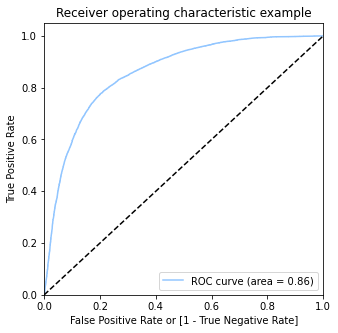

In [277]:
draw_roc(y_train_smt_pred_final.Churn, y_train_smt_pred_final.Churn_Prob)

#### Optimal cutoff point

In [278]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_smt_pred_final[i]= y_train_smt_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_smt_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.736090,1,1,1,1,1,1,1,1,1,0,0
1,0,0.003640,0,1,0,0,0,0,0,0,0,0,0
2,0,0.031233,0,1,0,0,0,0,0,0,0,0,0
3,0,0.568041,1,1,1,1,1,1,1,0,0,0,0
4,0,0.526677,1,1,1,1,1,1,1,0,0,0,0


In [279]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_smt_pred_final.Churn, y_train_smt_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.636682  0.987306  0.286058
0.2   0.2  0.694249  0.960299  0.428198
0.3   0.3  0.737345  0.918769  0.555921
0.4   0.4  0.767513  0.866688  0.668338
0.5   0.5  0.784595  0.807084  0.762106
0.6   0.6  0.782976  0.731912  0.834039
0.7   0.7  0.751450  0.607951  0.894949
0.8   0.8  0.677349  0.405318  0.949381
0.9   0.9  0.557123  0.129238  0.985008


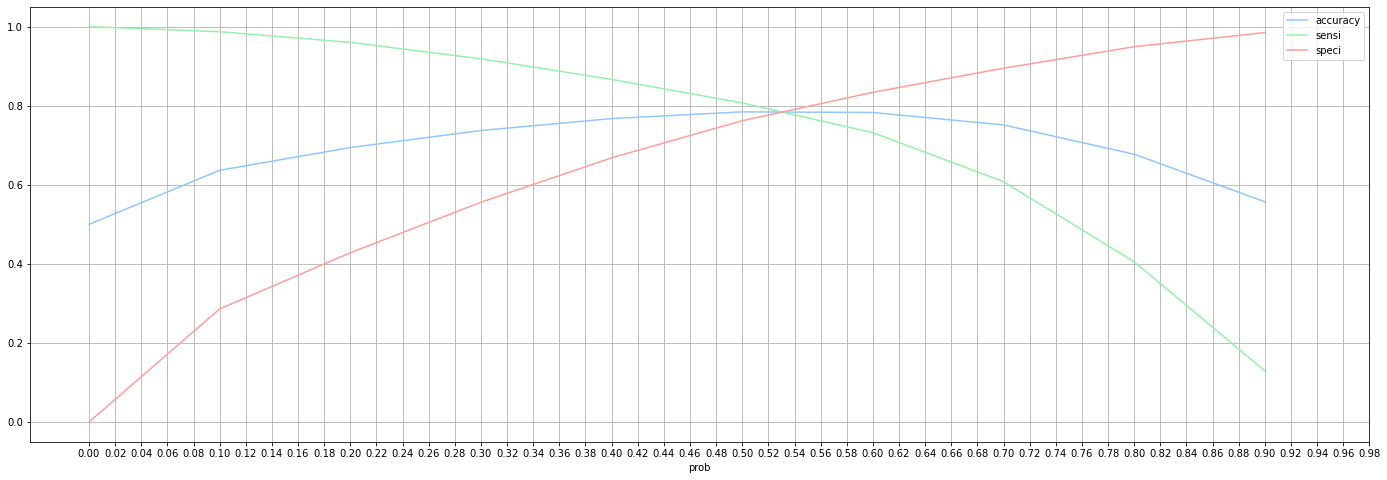

In [280]:
# Plot accuracy sensitivity and specificity for various probabilities.
plt.figure
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],xticks=np.arange(0,1,0.02), figsize=(24,8))
plt.grid(b=True)
plt.show()


0.53 cutoff value seems optimal for our Model

#### Predicting on test data

In [281]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.53 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
10516,0,0.051430,0
12631,0,0.243056,0
23446,0,0.194385,0
6840,0,0.371916,0
18826,0,0.489966,0


In [282]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy for Test set:-",metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))



[[6407 1818]
 [  68  156]]

Accuracy for Test set:- 0.7767783169605871
Sensitivity:- 0.6964285714285714
Specificity:- 0.7789665653495441


Accuracy for Train set: 0.78

Sensitivity is 0.80

Accuracy for Test set: 0.77
    

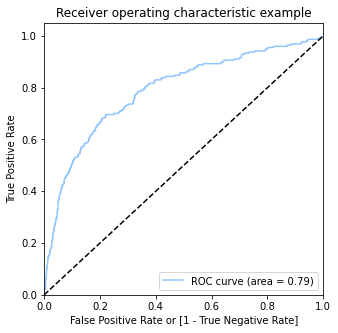

In [283]:
# ROC curve for Test set
draw_roc(y_test_pred_final.Churn, y_test_pred_final.Churn_Prob)

The AUC score for train dataset is 0.86 and the test dataset is 0.79. It can be considered a good model

In [284]:
# Top 10 predictors

abs(res.params).sort_values(ascending=False)[0:11]

std_ic_t2t_mou_8        21.773393
total_rech_num_8        21.199423
std_ic_mou_8            16.951957
vol_2g_mb_8             15.412662
gd_ph_total_rech_num    13.543666
gd_ph_isd_ic_mou        12.527914
roam_ic_mou_8           12.325954
gd_ph_std_ic_mou        12.092451
gd_ph_std_ic_t2t_mou     9.632244
gd_ph_vol_2g_mb          7.873176
sachet_2g_8              7.534823
dtype: float64

## PCA

Note -
While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
So we'll calculate the PCs using the train data, and apply them later on the test data

In [285]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (19714, 58)
Dimension of X_test: (8449, 58)


In [286]:
# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[cont] = scaler.fit_transform(X_train[cont])
X_test[cont] = scaler.transform(X_test[cont])

In [287]:
# Applying SMOTE technique for data imbalance correction

smt = SMOTE(random_state=42)
X_train_smt,y_train_smt = smt.fit_resample(X_train,y_train)
print("Dimension of X_train_smt Shape:", X_train_smt.shape)
print("Dimension of y_train_smt Shape:", y_train_smt.shape)

X_train_sm.head()

Dimension of X_train_smt Shape: (38318, 58)
Dimension of y_train_smt Shape: (38318,)


,const,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,gd_ph_isd_ic_mou,gd_ph_sachet_3g,gd_ph_std_ic_mou,gd_ph_std_ic_t2t_mou,gd_ph_roam_og_mou,gd_ph_total_rech_num,gd_ph_vol_2g_mb
0,1.0,0.316751,0.0,0.0,0.037414,0.116547,0.000096,0.000000,0.000643,0.036496,0.106452,0.000000,0,0.000000,0.0,0.000000,0.000002,0.0,0.0,0.002159,0.000769,0.034353,0.074434,0.000000
1,1.0,0.437577,0.0,0.0,0.014273,0.397774,0.004756,0.023163,0.018571,0.051095,0.419355,0.016575,1,0.022727,0.0,0.054703,0.000000,0.0,0.0,0.005139,0.000249,0.003538,0.038835,0.000030
2,1.0,0.499969,0.0,0.0,0.000000,0.384213,0.000000,0.000000,0.000000,0.007299,0.496774,0.002348,1,0.000000,0.0,0.051807,0.092868,0.0,0.0,0.000242,0.000126,0.000000,0.048544,0.010938
3,1.0,0.384704,0.0,0.0,0.000000,0.096623,0.003479,0.000000,0.002176,0.087591,0.000000,0.000000,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.006835,0.005850,0.000000,0.084142,0.000000
4,1.0,0.209400,0.0,0.0,0.000000,0.046315,0.000000,0.000000,0.000000,0.000000,0.419355,0.000000,0,0.000000,0.0,0.029843,0.008543,0.0,0.0,0.001407,0.000000,0.000000,0.032362,0.000579


In [288]:
X_train.shape

(19714, 58)

In [289]:
# Importing PCA

from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 

# Applying PCA on train data 
pca.fit(X_train_smt) 

X_train_smt_pca=pca.fit_transform(X_train_smt)
print("Dimension of X_train_smt_pca: ",X_train_smt_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_smt_pca:  (38318, 58)
Dimension of X_test_pca:  (8449, 58)


In [290]:
pca.components_

array([[ 4.03587683e-05,  8.18290044e-07,  3.69110844e-07, ...,
        -1.04727693e-04,  3.85729767e-05,  9.99999861e-01],
       [ 2.21590906e-01,  1.33313000e-03,  1.53893344e-03, ...,
        -7.61839799e-02,  2.41778018e-01, -3.79170417e-04],
       [-8.55009399e-02,  4.02253421e-04,  7.39703570e-04, ...,
         7.83065226e-02, -2.74029835e-01, -2.24689025e-04],
       ...,
       [-5.91329291e-04,  6.69004598e-04, -6.75689229e-03, ...,
        -1.16369762e-04, -1.65393074e-03,  2.94260949e-07],
       [ 4.42453368e-04, -2.21564677e-03,  5.25724770e-03, ...,
        -1.57584214e-03, -4.86643478e-04, -3.09643564e-07],
       [ 0.00000000e+00,  3.07774822e-15, -1.52996724e-15, ...,
        -1.15972891e-16, -1.68547815e-16,  7.05950820e-05]])

In [291]:
pca.explained_variance_ratio_

array([9.99997060e-01, 6.73431997e-07, 5.08550255e-07, 4.76241536e-07,
       2.90737185e-07, 1.99394072e-07, 1.47150376e-07, 1.14929078e-07,
       9.40294914e-08, 8.79494215e-08, 7.33275278e-08, 6.34152413e-08,
       4.79565851e-08, 3.78615263e-08, 3.18006294e-08, 2.53022696e-08,
       1.42960873e-08, 9.52290652e-09, 8.19282014e-09, 7.16611584e-09,
       3.42678407e-09, 3.20576421e-09, 2.59285268e-09, 1.93241041e-09,
       1.82171394e-09, 1.69327387e-09, 1.35693903e-09, 1.31884958e-09,
       1.25020466e-09, 1.22267353e-09, 1.13725638e-09, 8.95194789e-10,
       8.40864564e-10, 6.26788815e-10, 5.94800647e-10, 4.83998678e-10,
       4.61181762e-10, 4.51545466e-10, 4.38213700e-10, 4.14034172e-10,
       4.06649247e-10, 3.97597976e-10, 2.80254277e-10, 2.50127098e-10,
       2.31664620e-10, 2.00618009e-10, 1.77170512e-10, 1.73258014e-10,
       1.46909012e-10, 1.36826240e-10, 1.30115925e-10, 1.23035773e-10,
       7.93702501e-11, 5.37897966e-11, 5.10275977e-11, 3.71224600e-11,
      

Making a scree plot for the explained variance

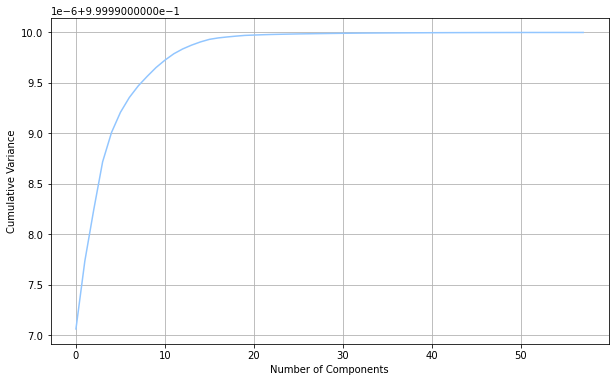

In [292]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(var_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(b=True)

95% of the data can be explained with 8 PCA components. So, we will perform PCA with 8 components.

#### Perform PCA with 8 components

In [293]:
pca_8 = PCA(n_components=8)

train_pca_8 = pca_8.fit_transform(X_train_smt)
print("Dimension for Train dataset using PCA: ", train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_8.shape)

Dimension for Train dataset using PCA:  (38318, 8)
Dimension for Test dataset using PCA:  (8449, 8)


### Model 2 : PCA + Logistic Regression Model

In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [295]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_smt)

# making the predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8: ", y_pred_df_8.shape)

Dimension of y_pred_df_8:  (8449, 1)


In [296]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_df_8),"\n")

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_df_8))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Print the report
print(metrics.classification_report(y_test, y_pred_df_8))




Confusion Matirx for y_test & y_pred
 [[6237 1972]
 [  62  178]] 

Accuracy:- 0.759261451059297
Sensitivity:- 0.6964285714285714
Specificity:- 0.7789665653495441
              precision    recall  f1-score   support

           0       0.99      0.76      0.86      8209
           1       0.08      0.74      0.15       240

    accuracy                           0.76      8449
   macro avg       0.54      0.75      0.50      8449
weighted avg       0.96      0.76      0.84      8449



### Model 3 : PCA + Decision Trees

In [297]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier


#### Hyperparameter tuning

In [298]:
# Create the parameter grid 

params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

In [299]:
# Instantiate the grid search CV model

dtree = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = params, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

In [300]:
# Fit the grid search to the data
grid_search.fit(train_pca_8,y_train_smt)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [301]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.211151,0.023512,0.004814,0.003931,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.806367,0.803758,0.832724,0.838684,0.823330,0.820973,0.013907,5
1,0.206536,0.044505,0.006090,0.001661,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.806367,0.803758,0.832724,0.838684,0.823330,0.820973,0.013907,5
2,0.201284,0.027700,0.005210,0.004325,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.801931,0.809760,0.826200,0.832681,0.821764,0.818467,0.011153,7
3,0.187426,0.014173,0.005510,0.003240,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.801931,0.809760,0.826200,0.832681,0.821764,0.818467,0.011153,7
4,0.329297,0.026759,0.003158,0.002598,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.831420,0.870564,0.876044,0.873662,0.879697,0.866277,0.017683,2
5,0.307101,0.003914,0.003207,0.001887,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.831159,0.870564,0.876044,0.873662,0.880219,0.866330,0.017866,1
6,0.301561,0.015900,0.003659,0.003494,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.812891,0.819676,0.838727,0.831115,0.829854,0.826453,0.009097,3
7,0.304102,0.038900,0.009955,0.002354,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.812891,0.819676,0.838727,0.831115,0.829854,0.826453,0.009097,3


In [302]:
# Printing the optimal sensitivity score and hyperparameters

print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)


Best sensitivity:- 0.8663295230808551
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


#### Model with optimal hyperparameters

In [303]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(train_pca_8, y_train_smt)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

#### Prediction on the train set

In [304]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(train_pca_8)

In [305]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smt, y_train_pred)
print(confusion)

[[15053  4106]
 [ 2044 17115]]


In [306]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [307]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smt, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8395010177984237
Sensitivity:- 0.8933138472780416
Specificity:- 0.7856881883188058


#### Prediction on the test set

In [308]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(test_pca_8)

In [309]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6242 1967]
 [  90  150]]


In [310]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7565392354124748
Sensitivity:- 0.625
Specificity:- 0.7603849433548544


### MODEL 3 : PCA + Random Forest

In [311]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

#### Hyperparameter tuning

In [312]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)


# Fit the model
grid_search.fit(train_pca_8, y_train_smt)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [313]:
# printing the optimal accuracy score and hyperparameters

print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.7833916778386841 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


#### Model with optimal hyperparameters

In [314]:
# model with the best hyperparameters

rf_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [315]:
# Fit the model
rf_model.fit(train_pca_8, y_train_smt)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

#### Prediction on the train set

In [316]:
# Predictions on the train set
y_train_pred = rf_model.predict(train_pca_8)

In [317]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smt, y_train_pred)
print(confusion)

[[14253  4906]
 [ 3352 15807]]


In [318]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smt, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.784487708126729
Sensitivity:- 0.8250430607025419
Specificity:- 0.743932355550916


#### Prediction on the test set

In [319]:
# Prediction on the test set
y_test_pred = rf_model.predict(test_pca_8)

In [320]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6109 2100]
 [  71  169]]


In [321]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [322]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

Accuracy:- 0.7430465143804
Sensitivity:- 0.7041666666666667
Specificity:- 0.744183213546108
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      8209
           1       0.07      0.70      0.13       240

    accuracy                           0.74      8449
   macro avg       0.53      0.72      0.49      8449
weighted avg       0.96      0.74      0.83      8449



### MODEL 3 : PCA + Xgboost

In [323]:
!pip install xgboost
import xgboost as xgb


In [324]:
import xgboost as xgb
pca_xgb = xgb.XGBClassifier(random_state=42, 
                                   objective='binary:logistic')
# scale_pos_weight takes care of class imbalance
pca_xgb.fit(train_pca_8, y_train_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [325]:
## Hyper parameter Tuning
parameters = {
              'learning_rate': [0.1, 0.2],
              'gamma' : [10,20,50],
              'max_depth': [2,3,4],
              'min_child_weight': [25,50],
              'n_estimators': [150,200]}
pca_xgb_search = GridSearchCV(estimator=pca_xgb , param_grid=parameters,scoring='roc_auc',cv = 3, n_jobs=-1, verbose=1)
pca_xgb_search.fit(train_pca_8, y_train_smt)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [10, 20, 50], 'learning_rate': [0.1, 0.2],
                         'max_depth': [2, 3, 4], 'min_child_weight': [25, 50],
                         'n_estimators': [150, 200]},
             scoring='roc_auc', verbose=1)

In [326]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_xgb_search.best_score_)
print('Best Parameters :', pca_xgb_search.best_params_)

Best ROC-AUC score : 0.9029006066453008
Best Parameters : {'gamma': 10, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 25, 'n_estimators': 150}


In [327]:
# Modelling using the best PCA-XGBoost Estimator 
pca_xgb_best = pca_xgb_search.best_estimator_
pca_xgb_best_fit = pca_xgb_best.fit(train_pca_8, y_train_smt)

# Prediction on Train set
y_train_pred_pca_xgb_best = pca_xgb_best_fit.predict(train_pca_8)
y_train_pred_pca_xgb_best[:5]

array([1, 0, 0, 1, 0])

In [330]:
# Prediction on test set
X_test_pca = pca_final.transform(X_test)
X_test_pca = pd.DataFrame(test_pca_8, index=X_test.index, columns = train_pca_8.columns)
y_test_pred_pca_xgb_best = pca_xgb_best_fit.predict(test_pca_8)
y_test_pred_pca_xgb_best[:5]

NameError: name 'pca_final' is not defined

In [ ]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance

train_matrix = confusion_matrix(y_train, y_train_pred_pca_xgb_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_xgb_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

## Conclusion

### Showing the results for all models on Test set

#### Model 1: Logistic regression with RFE

Accuracy:- 0.776
Sensitivity:- 0.696
Specificity:- 0.778


#### Model 2: PCA + Logistic regression

Accuracy:- 0.738
Sensitivity:- 0.708
Specificity:- 0.738

    
#### Model 3: PCA + Decision Tree 

Accuracy:- 0.755
Sensitivity:- 0.625
Specificity:- 0.759
    
    
#### Model 4: PCA + Random forest

Accuracy:- 0.738
Sensitivity:- 0.708
Specificity:- 0.738

Conclusion: All model results are comparable and similar. The model with Logistic regression using RFE has performed better than others and PCA didnt not play much role in improving performance.

#### Most Important Predictors of churn , in the order of importance are : 

In [ ]:
std_ic_t2t_mou_8        
total_rech_num_8        
std_ic_mou_8           
vol_2g_mb_8             
gd_ph_total_rech_num    
gd_ph_isd_ic_mou        
roam_ic_mou_8           
gd_ph_std_ic_mou       
gd_ph_std_ic_t2t_mou     
gd_ph_vol_2g_mb         
sachet_2g_8             

1. Customers who churn show lower number of recharges done in action period

2. We can deduce that many high revenue generating customers having very low minutes of usage have churned in action phase. Hence we can target high revenue customers with reduced MOU in action phase.
3. Customers whose max recharge amount and local outgoing services were both very less in the good phase and active phase churned more
4. Models with high sensitivity are the best for predicting churn. Use the PCA + Logistic Regression model to predict churn. It has an ROC score of 0.79, test sensitivity of 70%